In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/subscribers.csv')


df3 = pd.read_csv('/content/drive/MyDrive/users.csv')


In [10]:
df1

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [9]:
df2

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True
...,...,...,...,...,...
10032,a11032,Email,1/17/18,1/24/18,False
10033,a11033,Email,1/17/18,NaN,True
10034,a11034,Email,1/17/18,NaN,True
10035,a11035,Email,1/17/18,NaN,True


In [8]:
df3

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English
...,...,...,...
10032,a11032,45-55 years,German
10033,a11033,55+ years,German
10034,a11034,55+ years,German
10035,a11035,0-18 years,German


In [15]:
merged_df = pd.merge(df1, df2, on='user_id')
df = pd.merge(merged_df, df3, on='user_id')
df

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True,Email,1/17/18,1/24/18,False,45-55 years,German
10033,a11033,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,55+ years,German
10034,a11034,1/5/18,Instagram,control,German,False,Email,1/17/18,NaN,True,55+ years,German
10035,a11035,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,0-18 years,German


In [17]:
merged_df.dtypes

user_id                object
date_served            object
marketing_channel      object
variant                object
language_displayed     object
converted              object
subscribing_channel    object
date_subscribed        object
date_canceled          object
is_retained            object
dtype: object

In [18]:
print(merged_df.describe())

       user_id date_served marketing_channel  variant language_displayed  \
count    10037       10021             10022    10037              10037   
unique   10037          31                 5        2                  4   
top      a1000     1/15/18         House Ads  control            English   
freq         1         789              4733     5091               9793   

       converted subscribing_channel date_subscribed date_canceled is_retained  
count      10022                1856            1856           577        1856  
unique         2                   5              31           115           2  
top        False           Instagram         1/16/18        4/2/18        True  
freq        8946                 600             163            15        1279  


In [19]:
print(merged_df.describe(include='object'))

       user_id date_served marketing_channel  variant language_displayed  \
count    10037       10021             10022    10037              10037   
unique   10037          31                 5        2                  4   
top      a1000     1/15/18         House Ads  control            English   
freq         1         789              4733     5091               9793   

       converted subscribing_channel date_subscribed date_canceled is_retained  
count      10022                1856            1856           577        1856  
unique         2                   5              31           115           2  
top        False           Instagram         1/16/18        4/2/18        True  
freq        8946                 600             163            15        1279  


In [20]:
print(merged_df.isnull().sum())

user_id                   0
date_served              16
marketing_channel        15
variant                   0
language_displayed        0
converted                15
subscribing_channel    8181
date_subscribed        8181
date_canceled          9460
is_retained            8181
dtype: int64


In [21]:
pay_users = merged_df[merged_df['converted'] == True]
marketing_channel = pay_users.groupby('marketing_channel')['user_id'].count().reset_index()
marketing_channel.columns = ['marketing_channel', 'pay_users_count']
print(marketing_channel)

  marketing_channel  pay_users_count
0             Email              193
1          Facebook              237
2         House Ads              298
3         Instagram              265
4              Push               83


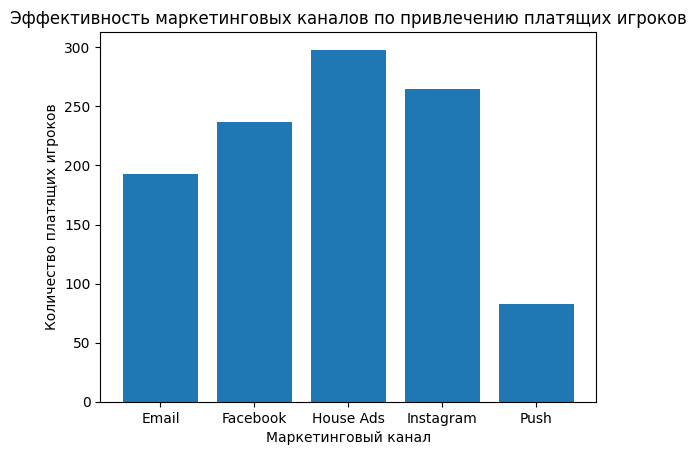

In [22]:
plt.bar(marketing_channel['marketing_channel'], marketing_channel['pay_users_count'])
plt.xlabel('Маркетинговый канал')
plt.ylabel('Количество платящих игроков')
plt.title('Эффективность маркетинговых каналов по привлечению платящих игроков')
plt.show()

In [24]:
total_users = merged_df.groupby('marketing_channel')['user_id'].count().reset_index()
total_users.columns = ['marketing_channel', 'total_users_count']
marketing_channel = pd.merge(marketing_channel, total_users, on='marketing_channel')
marketing_channel['conversion_rate'] = marketing_channel['pay_users_count'] / marketing_channel['total_users_count']
print(marketing_channel)

  marketing_channel  pay_users_count  total_users_count  conversion_rate
0             Email              193                565         0.341593
1          Facebook              237               1860         0.127419
2         House Ads              298               4733         0.062962
3         Instagram              265               1871         0.141635
4              Push               83                993         0.083585


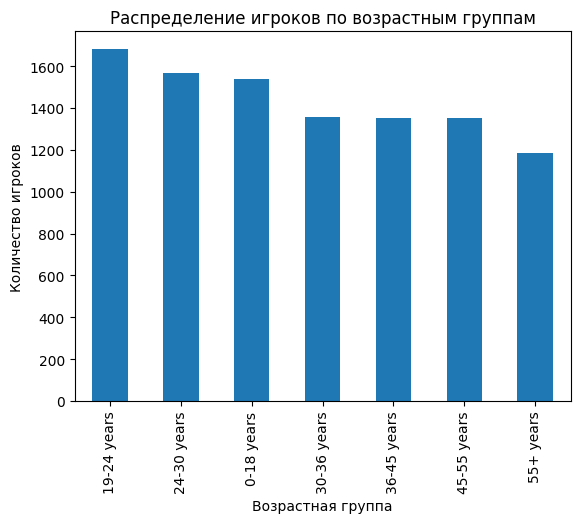

In [28]:
age_counts = df['age_group'].value_counts()
age_counts.plot(kind='bar')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество игроков')
plt.title('Распределение игроков по возрастным группам')
plt.show()

In [45]:
earliest = merged_df['date_subscribed'].dropna().min()
print(earliest)

1/1/18


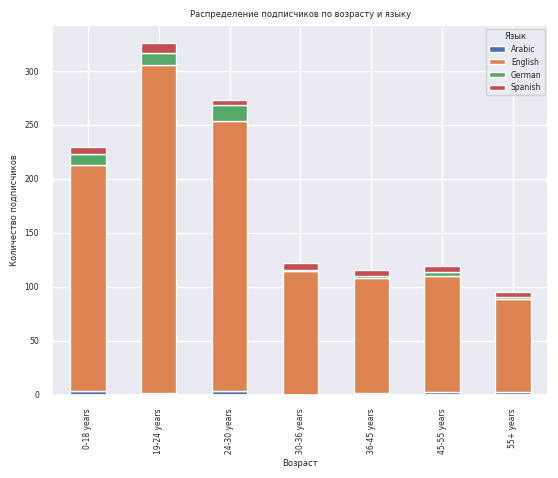

In [46]:
df_retained = df[df['is_retained']==True]
pivot_table = df_retained.groupby(['age_group','language_preferred']).size().unstack()
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Возраст')
plt.ylabel('Количество подписчиков')
plt.title('Распределение подписчиков по возрасту и языку')
plt.legend(title='Язык')
plt.show()

In [47]:
data = {
    'variant': ['personalization', 'control'],
    'Converted=True': [df[(df['variant'] == 'personalization') & (df['converted'] == True)].shape[0],
                       df[(df['variant'] == 'control') & (df['converted'] == True)].shape[0]],
    'Converted=False': [df[(df['variant'] == 'personalization') & (df['converted'] == False)].shape[0],
                        df[(df['variant'] == 'control') & (df['converted'] == False)].shape[0]]
}

table = pd.DataFrame(data)
print(table)


           variant  Converted=True  Converted=False
0  personalization             705             4241
1          control             371             4705


In [50]:
from scipy import stats
controlconversion = df[df['variant'] == 'control']['converted']
personalizationconversion = df[df['variant'] == 'personalization']['converted']
t_statistic, p_value = stats.ttest_ind(controlconversion, personalizationconversion, equal_var=True)
print('T-статистика:', t_statistic)
print('P-значение:', p_value)

T-статистика: nan
P-значение: nan


In [51]:
def value(x):
    return - 45*x[0] - 80*x[1]


neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([400 - 5 * x [0] - 20 * x [1],
                                         450 - 10 * x [0] - 15 * x [1]])}


from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])


from scipy.optimize import minimize
x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)
print('Кол-во потраченного материала:', 5 * 24 + 20 * 14)
print('Кол-во потраченных ч:', 10 * 24 + 15 * 14)
print('Максимизированная прибыль составляет:', -1*value([24, 14]),'тыс.руб./месяц')

[24. 14.]
Кол-во потраченного материала: 400
Кол-во потраченных ч: 450
Максимизированная прибыль составляет: 2200 тыс.руб./месяц


In [52]:
df1 = pd.DataFrame({'day': [1,3,7,14, 21, 30],
                   'revenue': [0.4, 0.6, 0.8, 1.10, 1.30, 1.40]})

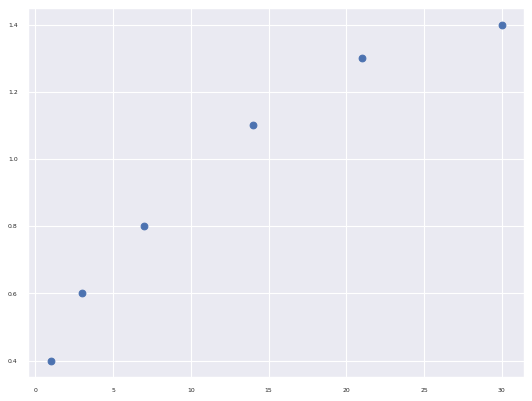

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df1['day'], df1['revenue'], label="Original Data" )

In [54]:
def log_func( x, a, b, c ):
    return -a * np.log2( b + x ) + c

In [55]:
def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c

In [56]:
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df1['day'], df1['revenue'])
exp_popt, exp_pcov = curve_fit(exp_func, df1['day'], df1['revenue'])

In [57]:
projection_endpoint = 90

In [58]:
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

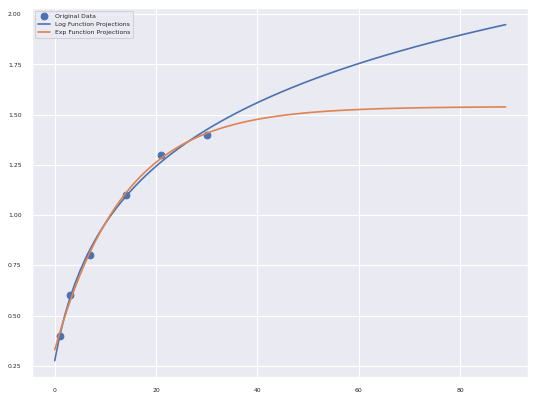

In [59]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df1['day'], df1['revenue'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [60]:
print('Прогноз среднего накопленного дохода через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз среднего накопленного дохода  через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз среднего накопленного дохода через 90 дней по log модели 2.0
Прогноз среднего накопленного дохода  через 90 дней по exp модели 2.0


In [61]:
y_log_pred = [log_y_projected[ i ] for i in list(df1['day'])]
y_log_pred

[0.40124030788520265,
 0.5868265922309144,
 0.8306563452037643,
 1.0918230784760043,
 1.2643750867065862,
 1.4250785895188456]

In [62]:
y_exp_pred = [exp_y_projected[ i ] for i in list(df1['day'])]
y_exp_pred

[0.4152644555519349,
 0.5694065241828665,
 0.81720684756981,
 1.108495305483976,
 1.2823787722727733,
 1.4072480949334225]

 логарифмическая функция аппроксимирует исследуемую зависимость с меньшей среднеквадратической ошибкой, поэтому целесообразнее использовать для прогноза только данную функцию.